**Home Assignment - 1**

Student Name - Harika Vinjamuri

Student ID   - 700769273

In [5]:
import tensorflow as tf

# 1. Tensor Manipulations & Reshaping

# Define a random tensor constant
random_constant = tf.constant([[1,2,3,4,5,6],
                               [1,1,2,2,3,3],
                               [6,5,4,3,2,1],
                               [0,0,0,0,0,0]]
                              )
print("Shape of Defined Constant:", tf.shape(random_constant).numpy())
print("Rank of Defined Constant:", tf.rank(random_constant).numpy())

# Reshape the tensor constant to (2,3,4)
print("Reshape performed...")
reshape_constant = tf.reshape(random_constant,(2,3,4))
print("Shape of Constant after Reshape:", tf.shape(reshape_constant).numpy())
print("Rank of Constant after Reshape:", tf.rank(reshape_constant).numpy())

# Transpose the tensor constant
print("Transpose performed...")
transpose_constant = tf.transpose(reshape_constant)
print("Shape of Constant after Transpose:", tf.shape(transpose_constant).numpy())
print("Rank of Constant after Transpose:", tf.rank(transpose_constant).numpy())

# Broadcasting Tensor
st = tf.constant([1,0,2,0])
b1t = tf.constant([[1,2,3,4],[0,0,0,0],[4,0,2,0],[0,0,0,0],[1,1,1,1]])
b2t = tf.constant([[1],[2],[3],[4]])

print("Broadcasted Output:", st+b1t)
print("Broadcasted Output:", st+b2t)


# Broadcasting is a technique used in TensorFlow (and NumPy) that allows operations
# on tensors of different shapes by automatically expanding their dimensions so
# that they become compatible.
# For broadcasting to work, TensorFlow follows specific rules:
# --> Align dimensions from the right.
# --> Dimensions must be equal, or one of them must be 1.
# --> TensorFlow will expand dimensions with size 1 to match the other tensor’s size in that axis.

Shape of Defined Constant: [4 6]
Rank of Defined Constant: 2
Reshape performed...
Shape of Constant after Reshape: [2 3 4]
Rank of Constant after Reshape: 3
Transpose performed...
Shape of Constant after Transpose: [4 3 2]
Rank of Constant after Transpose: 3
Broadcasted Output: tf.Tensor(
[[2 2 5 4]
 [1 0 2 0]
 [5 0 4 0]
 [1 0 2 0]
 [2 1 3 1]], shape=(5, 4), dtype=int32)
Broadcasted Output: tf.Tensor(
[[2 1 3 1]
 [3 2 4 2]
 [4 3 5 3]
 [5 4 6 4]], shape=(4, 4), dtype=int32)


Predicted Values 1...
Mean Square Error:  0.032500006
Categorical Cross Entropy:  4.3862624
Predicted Values 2...
Mean Square Error:  0.20750001
Categorical Cross Entropy:  4.601615


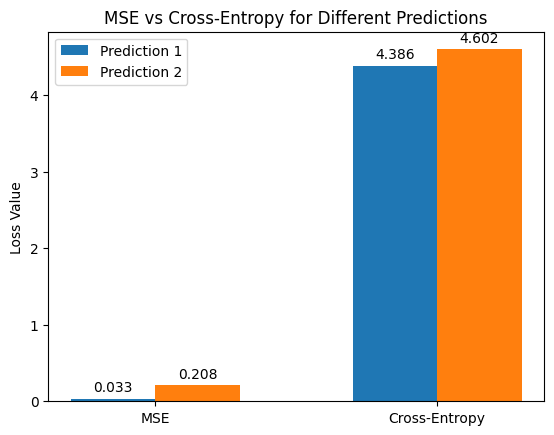

In [ ]:
# 2. 2.	Loss Functions & Hyperparameter Tuning
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Actual y values
y_true = tf.constant([1.0,0.0,1.0,2.0])

# Predicted y values
y_predict_1 = tf.constant([0.9,0.2,0.8,1.8])

# Defining Functions for mean_square_error and categorical_cross_entropy
mse_fn = tf.keras.losses.MeanSquaredError()
cce_fn = tf.keras.losses.CategoricalCrossentropy()

mse_1 = mse_fn(y_true, y_predict_1).numpy()
cce_1 = cce_fn(y_true, y_predict_1).numpy()

# Predicted 1 Values Loss information
print("Predicted Values 1...")
print("Mean Square Error: ", mse_1)
print("Categorical Cross Entropy: ",cce_1)

y_predict_2 = tf.constant([0.6,0.3,0.7,1.3])
mse_2 = mse_fn(y_true, y_predict_2).numpy()
cce_2 = cce_fn(y_true, y_predict_2).numpy()

# Predicted 2 Values Loss information
print("Predicted Values 2...")
print("Mean Square Error: ", mse_2)
print("Categorical Cross Entropy: ",cce_2)


# Bar plot for comparing the loss values
labels = ['MSE', 'Cross-Entropy']
losses_1 = [mse_1, cce_1]
losses_2 = [mse_2, cce_2]

x = np.arange(len(labels))
width = 0.30

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, losses_1, width, label='Prediction 1')
bars2 = ax.bar(x + width/2, losses_2, width, label='Prediction 2')

ax.set_ylabel('Loss Value')
ax.set_title('MSE vs Cross-Entropy for Different Predictions')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.show()

In [ ]:
import tensorflow as tf
import datetime
import os

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizing pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Building neural network
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Setting up TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Training TensorBoard logging
model.fit(x_train, y_train,
          epochs=5,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard_callback])

# As per the observed patterns for the 5 epochs, I get a result of a generalized model
# where the Traing and Test Data accuracy increased and the loos values for both the
# training and testing data decreased

# The tensor board is used to identify if a model is overfit, underfit or a generalized model
# for a overfit case - we could identify that the training is too good and the test accuracy
# show bad results

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8748 - loss: 0.4374 - val_accuracy: 0.9570 - val_loss: 0.1445
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9634 - loss: 0.1255 - val_accuracy: 0.9679 - val_loss: 0.1073
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9772 - loss: 0.0787 - val_accuracy: 0.9732 - val_loss: 0.0884
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9817 - loss: 0.0589 - val_accuracy: 0.9765 - val_loss: 0.0761
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9860 - loss: 0.0460 - val_accuracy: 0.9770 - val_loss: 0.0764


In [ ]:
# Testing by increasing the epochs
model.fit(x_train, y_train,
          epochs=15,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard_callback])

# When the epochs are increased I could observed that the training model is
# learning the data i.e after a certain point the training accuracy get stabilized
# and the loss number also gives very minimual number, but the testing accuracy
# performace degrades

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9986 - loss: 0.0044 - val_accuracy: 0.9779 - val_loss: 0.1064
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9990 - loss: 0.0031 - val_accuracy: 0.9784 - val_loss: 0.1117
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9979 - loss: 0.0066 - val_accuracy: 0.9800 - val_loss: 0.1045
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9993 - loss: 0.0027 - val_accuracy: 0.9785 - val_loss: 0.1224
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9992 - loss: 0.0027 - val_accuracy: 0.9777 - val_loss: 0.1183
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9983 - loss: 0.0050 - val_accuracy: 0.9785 - val_loss: 0.1174
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9996 - loss: 0.0017 - val_accuracy: 0.9784 - val_loss: 0.1092
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9992 - loss: 0.0